In [23]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
np.set_printoptions(threshold=np.inf)

from wordcloud import WordCloud, STOPWORDS as stopwords
from wordcloud import ImageColorGenerator
import konlpy
from konlpy.tag import Okt

from PIL import Image, ImageFilter

from collections import Counter

In [24]:
kakao = open('kakaotalk.txt', encoding = 'utf-8').read()

kakao_noun = Okt().nouns(kakao)

kakao_noun

['기',
 '운영',
 '진',
 '님',
 '카카오',
 '톡',
 '대화',
 '저장',
 '날짜',
 '금요일',
 '유건',
 '욱',
 '권',
 '도윤',
 '권',
 '도윤',
 '컴',
 '조윤준',
 '권',
 '도윤',
 '컴',
 '조윤준',
 '이용',
 '님',
 '권',
 '도윤',
 '컴',
 '조윤준',
 '이용',
 '님',
 '김준형',
 '권',
 '도윤',
 '컴',
 '조윤준',
 '이용',
 '님',
 '김준형',
 '박준성',
 '초대',
 '유건',
 '욱',
 '오후',
 '님덜',
 '유건',
 '욱',
 '오후',
 '다담',
 '주',
 '유건',
 '욱',
 '오후',
 '프로젝트',
 '발표',
 '유건',
 '욱',
 '오후',
 '유건',
 '욱',
 '오후',
 '참여',
 '가능',
 '컴',
 '조윤준',
 '오후',
 '톡방',
 '컴',
 '조윤준',
 '오후',
 '가능',
 '유건',
 '욱',
 '오후',
 '윤준',
 '도윤',
 '필',
 '유건',
 '욱',
 '오후',
 '유건',
 '욱',
 '오후',
 '이모티콘',
 '이용',
 '오후',
 '전',
 '번주',
 '이용',
 '오후',
 '참여',
 '가능',
 '유건',
 '욱',
 '오후',
 '유건',
 '욱',
 '오후',
 '우리',
 '피드백',
 '주로',
 '이용',
 '오후',
 '플젝',
 '발표',
 '이틀',
 '안해',
 '유건',
 '욱',
 '오후',
 '유건',
 '욱',
 '오후',
 '하루',
 '유건',
 '욱',
 '오후',
 '중간',
 '유건',
 '욱',
 '오후',
 '하루',
 '최종',
 '유건',
 '욱',
 '오후',
 '유건',
 '욱',
 '오후',
 '원래',
 '번',
 '자',
 '이용',
 '오후',
 '아하',
 '이번',
 '주가',
 '이용',
 '오후',
 '발표',
 '유건',
 '욱',
 '오후',
 '이번',
 '승민',
 '이형',
 '유건',
 '욱

In [25]:
Counter(kakao_noun).most_common(500)

[('오후', 24347),
 ('박준성', 6592),
 ('이용', 6169),
 ('욱', 6030),
 ('유건', 6021),
 ('김준형', 4725),
 ('오전', 2776),
 ('도윤', 2678),
 ('권', 2586),
 ('컴', 1174),
 ('조윤준', 1145),
 ('나', 505),
 ('이모티콘', 383),
 ('우리', 293),
 ('거', 279),
 ('내', 243),
 ('그', 218),
 ('임', 215),
 ('사진', 213),
 ('왜', 205),
 ('팀', 203),
 ('뭐', 197),
 ('함', 183),
 ('사람', 181),
 ('준형', 179),
 ('명', 179),
 ('그냥', 176),
 ('개', 168),
 ('말', 167),
 ('세션', 156),
 ('그거', 156),
 ('누', 156),
 ('이번', 154),
 ('너', 148),
 ('진짜', 144),
 ('좀', 140),
 ('지금', 138),
 ('오', 135),
 ('쿤', 131),
 ('생각', 128),
 ('윤준', 125),
 ('뉴', 124),
 ('준성', 122),
 ('오늘', 121),
 ('주', 115),
 ('때', 110),
 ('난', 104),
 ('건욱', 103),
 ('시간', 103),
 ('형', 102),
 ('기', 96),
 ('술', 95),
 ('이형', 89),
 ('더', 84),
 ('어디', 83),
 ('해', 81),
 ('선배', 80),
 ('흠', 79),
 ('발표', 78),
 ('디자인', 78),
 ('풀이', 77),
 ('후', 71),
 ('이', 71),
 ('엔', 70),
 ('애', 70),
 ('제', 70),
 ('분', 69),
 ('전체', 69),
 ('알', 68),
 ('학기', 67),
 ('누구', 66),
 ('일단', 64),
 ('수', 62),
 ('안', 61),
 ('비', 61

In [48]:
kakao_stopwords = ['님', '카카오','톡','대화','저장','날짜','오전','오후','월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일', '사진', '이모티콘','삭제']
kakao_stopwords.extend(['박준성', '김준형', '권', '도윤', '컴', '조윤준', '이용', '하', '욱', '유건', '이모티콘', '운영','진','기'])

kakao_stopwords

['님',
 '카카오',
 '톡',
 '대화',
 '저장',
 '날짜',
 '오전',
 '오후',
 '월요일',
 '화요일',
 '수요일',
 '목요일',
 '금요일',
 '토요일',
 '일요일',
 '사진',
 '이모티콘',
 '삭제',
 '박준성',
 '김준형',
 '권',
 '도윤',
 '컴',
 '조윤준',
 '이용',
 '하',
 '욱',
 '유건',
 '이모티콘',
 '운영',
 '진',
 '기']

In [49]:
kakao_noun=[each for each in kakao_noun if each not in kakao_stopwords]
kakao_noun

['초대',
 '님덜',
 '다담',
 '주',
 '프로젝트',
 '발표',
 '참여',
 '가능',
 '톡방',
 '가능',
 '윤준',
 '필',
 '전',
 '번주',
 '참여',
 '가능',
 '우리',
 '피드백',
 '주로',
 '플젝',
 '발표',
 '이틀',
 '안해',
 '하루',
 '중간',
 '하루',
 '최종',
 '원래',
 '번',
 '자',
 '아하',
 '이번',
 '주가',
 '발표',
 '이번',
 '승민',
 '이형',
 '발표',
 '마지막',
 '쏘샏',
 '엔',
 '하드캐리',
 '부탁',
 '한당',
 '저',
 '능력',
 '나',
 '봉사활동',
 '최종',
 '때',
 '가능',
 '일루',
 '무단',
 '결석',
 '결',
 '제명',
 '임',
 '디자인',
 '엔',
 '거절',
 '디자인',
 '디자인',
 '거절',
 '혼자',
 '공부',
 '발제',
 '준형쿤',
 '징',
 '징',
 '나',
 '주감',
 '홍',
 '형',
 '출석',
 '좀',
 '어디',
 '간다',
 '마지막',
 '주',
 '감',
 '형',
 '친구',
 '여친',
 '간다',
 '최종',
 '발표',
 '마지막',
 '주',
 '마지막',
 '주',
 '전주',
 '그때',
 '마지막',
 '세션',
 '마지막',
 '주',
 '이지',
 '오예',
 '준형',
 '쿤',
 '준형',
 '쿤',
 '파설',
 '이번',
 '오',
 '그',
 '과제',
 '자료',
 '드림',
 '족보',
 '구',
 '천사',
 '파설',
 '나중',
 '지금',
 '밖',
 '어예',
 '난',
 '경영',
 '튕겼어',
 '공대생',
 '나',
 '경양',
 '개',
 '뎅',
 '전공',
 '어찌',
 '일이',
 '프로그래밍',
 '애',
 '널리',
 '스',
 '나',
 '비즈니스',
 '프로그래밍',
 '더',
 '비프',
 '개빡셌나',
 '나',
 '백퍼',
 '님들',
 '얼굴',
 '보기',
 '와빅',
 '

In [50]:
Counter(kakao_noun).most_common(500)

[('나', 505),
 ('우리', 293),
 ('거', 279),
 ('내', 243),
 ('그', 218),
 ('임', 215),
 ('왜', 205),
 ('팀', 203),
 ('뭐', 197),
 ('함', 183),
 ('사람', 181),
 ('준형', 179),
 ('명', 179),
 ('그냥', 176),
 ('개', 168),
 ('말', 167),
 ('세션', 156),
 ('그거', 156),
 ('누', 156),
 ('이번', 154),
 ('너', 148),
 ('진짜', 144),
 ('좀', 140),
 ('지금', 138),
 ('오', 135),
 ('쿤', 131),
 ('생각', 128),
 ('윤준', 125),
 ('뉴', 124),
 ('준성', 122),
 ('오늘', 121),
 ('주', 115),
 ('때', 110),
 ('난', 104),
 ('건욱', 103),
 ('시간', 103),
 ('형', 102),
 ('술', 95),
 ('이형', 89),
 ('더', 84),
 ('어디', 83),
 ('해', 81),
 ('선배', 80),
 ('흠', 79),
 ('발표', 78),
 ('디자인', 78),
 ('풀이', 77),
 ('후', 71),
 ('이', 71),
 ('엔', 70),
 ('애', 70),
 ('제', 70),
 ('분', 69),
 ('전체', 69),
 ('알', 68),
 ('학기', 67),
 ('누구', 66),
 ('일단', 64),
 ('수', 62),
 ('안', 61),
 ('비', 61),
 ('내일', 60),
 ('존나', 60),
 ('수업', 60),
 ('과제', 59),
 ('데', 59),
 ('이제', 59),
 ('친구', 58),
 ('기획', 58),
 ('또', 57),
 ('하나', 57),
 ('사이언스', 57),
 ('어제', 56),
 ('가능', 55),
 ('한번', 52),
 ('여기', 52),
 ('저', 51)

In [51]:
kakao_dict = dict(Counter(kakao_noun).most_common(500))
kakao_dict

{'가능': 55,
 '가면': 17,
 '가야': 26,
 '가지': 11,
 '각': 22,
 '간': 14,
 '간다': 29,
 '감': 35,
 '갑자기': 27,
 '갓': 19,
 '강의': 25,
 '강의실': 16,
 '개': 168,
 '개꿀': 28,
 '개발': 11,
 '갠톡': 16,
 '걔': 12,
 '거': 279,
 '거기': 50,
 '거눅': 29,
 '거의': 39,
 '거임': 11,
 '거지': 19,
 '걱정': 31,
 '건': 12,
 '건가': 29,
 '건욱': 103,
 '걸': 48,
 '검색': 26,
 '것': 39,
 '게': 12,
 '게시판': 11,
 '겡': 12,
 '겨': 17,
 '결과': 12,
 '결석': 23,
 '결정': 13,
 '계속': 22,
 '고': 20,
 '고고': 10,
 '고민': 11,
 '고분': 12,
 '고생': 12,
 '곳': 19,
 '공모전': 12,
 '공부': 39,
 '공유': 16,
 '공지': 27,
 '과제': 59,
 '관심': 18,
 '교수': 45,
 '교육': 16,
 '구': 25,
 '구현': 28,
 '굳이': 10,
 '그': 218,
 '그거': 156,
 '그것': 17,
 '그게': 40,
 '그날': 21,
 '그냥': 176,
 '그때': 27,
 '극혐': 11,
 '금욜': 10,
 '기간': 12,
 '기네': 34,
 '기분': 12,
 '기수': 21,
 '기억': 11,
 '기준': 13,
 '기차': 11,
 '기획': 58,
 '김': 11,
 '껄껄': 13,
 '꼭': 13,
 '끝': 30,
 '끼리': 17,
 '나': 505,
 '나머지': 10,
 '나중': 13,
 '낙타': 13,
 '난': 104,
 '날': 22,
 '남': 14,
 '내': 243,
 '내용': 23,
 '내일': 60,
 '낼': 17,
 '너': 148,
 '넌': 13,
 '네': 26,
 '네이버': 19,
 

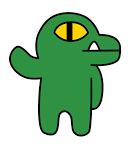

In [52]:
Image.open('kakaocon.png')

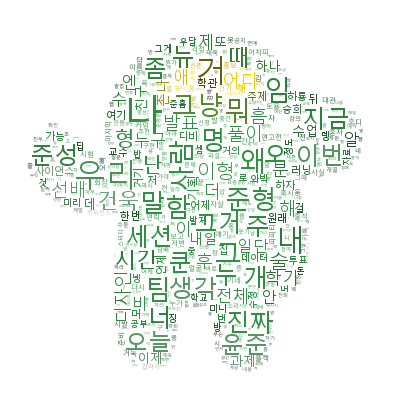

In [53]:
kakao_mask = np.array(Image.open("kakaocon.png").resize((400,400)))
image_colors = ImageColorGenerator(kakao_mask)

kakaotalk_wc = WordCloud(font_path="c:/Windows/Fonts/malgun.ttf",
                         background_color = "white",
                          stopwords = stopwords,
                          mode = "RGBA",
                          max_words = 1000,
                          mask = kakao_mask,
                        color_func = image_colors,
                         max_font_size = 40,
                          min_font_size = 2,
                            )

kakaotalk_wc.generate_from_frequencies(kakao_dict)
kakaotalk_wc.to_image()

In [88]:
kakaotalk_wc.to_file("kakaotalk_wc.png")

---